<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 4 - Pauta </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <h3> _5 de Mayo 2017_ </h3>
</center>

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Introducción](#intro)
* [3.- Explicación](#explicacion)
* [4.- Preguntas](#preguntas)
     - [Pregunta 1](#pregunta1)
     - [Pregunta 2](#pregunta2)
     - [Pregunta 3](#pregunta3)
     - [Pregunta 4](#pregunta4)
* [4.- Instrucciones](#instr)
* [5.- Referencias](#ref)

<div id='obj' />
# 1. _Objetivos_

Para la presente tarea se tiene por objetivos:

<ol>
<li> Estudiar un caso de aplicación de problemas condición de frontera </li>
<li> Aprender y analizar métodos mas complejos para la solución numérica de sistemas ecuaciones no lineales (raíces)</li>
<li> Realizar un análisis al método de disparo aplicado a un sistema de ecuaciones </li>

</ol>

<div id='intro' />
# 2. _Introducción_ 

En este laboratorio se analizará como resolver sistemas de ecuaciones diferenciales no lineales a travez del _shooting method_.  Ademas veremos su uso en aplicaciones reales, como lo es el modelo _SIR_, que explica la evolución de una enfermedad infecciosa creada por un virus o una bacteria.

<div id='explicacion' />
# 3. _Explicación_ 

El modelo SIR es un modelo básico que explica la evolución de una enfermedad infecciosa creada por un virus o una bacteria. Un ejemplo de este tipo de enfermedades es la gripe A o el ébola. 

Este modelo consiste en un sistema de 3 **_EDO’s_ no lineales** que no posee una solución explícita. Sin embargo, usando herramientas matemáticas y computacionales podemos extraer información acerca de las soluciones del sistema. El modelo SIR es un modelo compartimental porque divide a la población en 3 compartimentos:

* _S(t)_: Representa al número de individuos susceptibles, individuos sanos que al entrar en contacto con la enfermedad pueden resultar infectados, en función del tiempo.

* _I(t)_: Representa al número de individuos infectados, individuos que pueden transmitir la enfermedad al grupo _S(t)_, en función del tiempo.

* _R(t)_: Representa al número de individuos retirados, individuos que se han recuperado de la enfermedad y se han vuelto inmunes o han muerto, en función del tiempo.

Ademas, se realizan las siguientes hipotesis:

* La población se mantiene constante, es decir, no se tienen en cuenta los nacimientos y muertes que se producen a lo largo del desarrollo de la enfermedad. Si denotamos por _N_ a la población total de individuos tenemos que la suma del número de individuos de cada uno de los 3 grupos es igual al total de la población:

$$N = S(t) + I(t) + R(t)$$

* La enfermedad se transmite por contacto directo entre las personas.
* En cuanto un individuo es infectado pasa a estar en el grupo de los infectados.
* Los individuos del grupo _I(t)_ se acaban recuperando de la enfermedad y adquieren la inmunidad o mueren (pasando en ambos casos al grupo _R(t)_).

La formulación del modelo nos lleva al siguiente sistema de ecuaciones diferenciales ordinarias no lineales:

$$
\begin{array}{ll}
\displaystyle \frac{dS}{dt} = -\beta\cdot S(t)\cdot I(t) & \displaystyle S(0)= S_0\\
\\
\displaystyle \frac{dI}{dt} = \beta\cdot S(t)\cdot I(t) - \alpha\cdot R(t) & \displaystyle I(0)=I_0\\
\\
\displaystyle \frac{dR}{dt} = \alpha\cdot R(t) & \displaystyle R(0)=R_0\\
\end{array}
$$

donde $S_0,I_0$ y $R_0$ son valores iniciales que tiene cada ecuación, y $\alpha > 0, \beta > 0$ son tasas que usted tendrá que analizar más adelante.

En el año 1978 se informó a la conocida revista British Medical Journal de un brote de gripe en un internado del norte de Inglaterra que se extendió del 22 de enero al 4 de febrero, afectando a una poblacion de 763 personas. Lamentablemente, debido a una falla del sistema se ha perdido la información de la evolución de esta epidemia. Uno de los datos recuperados es el siguiente: La cantidad de personas **infectadas** a los 14 dias es 23. Se le ha pedido entonces al curso de _Computación Cientifica 2_ que analize y resuelva este problema.

Para este ejercicio ,se va a implementar el 'método del disparo' para el sistema de ecuaciones presentado, de modo que para encontrar encontrar la raiz <code>F(s) = 0 </code> es necesario un método mas complejo que el método de bisección, de modo que introducimos el <em>método de Broyden</em>$^1$ 

<div id='broy' />
<h3> Broyden's Method </h3>
<p>En análisis numérico, el método de Broyden es un método quasi-Newtoniano para encontrar raíces en un sistema de <code>k</code> variables. El conocido método de Newton es usado para encontrar un x tal que <code>f(x) = 0</code>, y para ello usa la matriz jacobiana <b><code>J</code></b>. Sin embargo, calcular esta matriz puede resultar en un costo computacional muy alto en algunos casos. La idea del método de Broyden es calcular la matriz jacobiana solo en la primera iteración, y generar actualizaciones en las siguientes iteraciones. </p>

<p> El pseudocódigo para el método de Broyden es el siguiente. Note que como parametros de entrada se necesita un vector de soluciones inicial $x_0$ y una matriz $B_0$ , la cual si es imposible de calcular, se puede usar $B_0 = I$: </p>
<h3> Broyden's Method PseudoCode </h3>

$1. \enspace x_0 = Initial Vector $

$2. \enspace B_0 = Initial Matrix $

$3. \enspace \textbf{for }  i = 0,1,2,...$

$4. \quad \quad x_{i+1} = x_{i} - B_{i} F(x_i)$

$5. \quad \quad B_{i+1} = B_{i} + \frac{(\delta_{i+1} - B_{i}\Delta_{i+1})\delta_{i+1}^T B_i}{\delta_{i+1}^T B_i\Delta_{i+1}}$

$6.\enspace \textbf{end}$

$7. \quad \quad where \enspace  \delta_i = x_i - x_{i-1} and \enspace \Delta_i = F(x_i) - F(x_{i-1})$



<div id='preguntas' />
# 4. _preguntas_ 

<div id='pregunta1' />
### Pregunta 1

<ul style="list-style-type: none;">
<li>
        
        <b>a)</b> Implemente el método de Broyden. Recuerde que para analizar la raiz de $F(x)$ en un sistema de ecuaciones debe analizar $||F(x)||_{2}$. Para comprobar el correcto funcionamiento del método, impleméntelo en el sistema de ecuaciones: 
        
        $$ F(x) = \begin{pmatrix} x_2^2 - x_1^3  \\ x_1^2 + x_2^2 - 1 \end{pmatrix} $$
        $$ x_0 =  \begin{pmatrix} 1 \\ 1 \end{pmatrix} \quad \quad B_{0} = F^{'}(x_0) $$
 <p> Compruebe sus resultados con la libreria <code> scipy.optimize.broyden2 </code> el cual tiene el método de Broyden II implementado. Analize el error absoluto entre el valor obtenido mediante la función implementada por usted y la función de <code> scipy.optimize. </code>    </p> $$$$ Explique ademas que sucede si aumenta uno de los 2 valores iniciales.
 
</ul>

<div id='pregunta2' />
### Pregunta 2

<ul style="list-style-type: none;">

    <li><b>b) </b> Resuelva el modelo _SIR_ con _Shooting Method_ para valores $\alpha = 0.4477$ y $\beta = 0.0022$. Dado que es un sistema de ecuaciones, la función _F_ debe tener al menos como parámetros de entrada los valores iniciales que no se encuentran estimados en el enunciado $I(0)$, y retornar el valor final que se encuentran en el enunciado $I(14)$. Recuerde que dado _Shooting Method_ es necesario usar un ODE-Solver para resolver Problemas de Valor Inicial (_IVP_) como _Euler Method_.
    $$$$
    Es recomendable que implemente una función que tome como parámetro un array de funciones (las 3 funciones del sistema de ecuaciones) y resuelva a la vez todas las funciones.
    </li>
    
</ul>

<div id='pregunta3' />
### Pregunta 3

<ul style="list-style-type: none;">
    <li> <b>c)</b> Grafique las soluciones del punto anterior es un único gráfico con respecto al tiempo. Para esto, guarde los valores de _S_,_I_ y _R_ en cada iteración, y grafiquelos con _plot_. Concluya que significa las curvas que genera su función. Puede usar la función _broyden_ que creo en el item 1 o usar la función <code>scipy.optimize.broyden2</code> de _python_. 
    </li>$$$$
    
</ul>

<div id='pregunta4' />
### Pregunta 4

<ul style="list-style-type: none;">
    <li> <b>d)</b> Como se mencionó antes, deberá descubir que significan las tasas $\alpha$ y $\beta$. Para esto, usando las mismas condiciones iniciales y finales, use la funcion <code> interact </code> de la libreria <code> ipywidgets </code>$^2$, donde **$\alpha \in \text{ }$[0.0011, 0.0022]** y **$\beta \in \text{ }$[0.4477, 0.8888]**. Para esto, deje una tasa fija y varíe la otra, y explique que sucede con las curvas generadas, concluyendo además que significa cada tasa y como influye su aumento o disminución en el gráfico. 
    </li>
    
</ul>

<div id='pregunta5' />
### Pregunta 5

<ul style="list-style-type: none;">
    <li> <b>e)</b>  En la siguiente tabla aparecen los datos del número real de personas enfermas cada día:    
    </li>
</ul>

| Día     |  Infectados reales  |
|:-------:|:-------------------:|
|    1    |         3           |
|    2    |         8           |
|    3    |         28          |
|    4    |         75          |
|    5    |         221         |
|    6    |         291         |
|    7    |         255         |
|    8    |         235         |
|    9    |         190         |
|    10   |         125         |
|    11   |         70          |
|    12   |         28          |
|    13   |         12          |
|    14   |         5           |


    
    
<ul style="list-style-type: none;">   
    <li> Se sabe además que la epidemia comenzó con un infectado, y que la poblacion inicial es de 763 personas. Determine los valores reales de $\alpha$ y $\beta$ que mejor se ajusten al caso, y explique los pasos que realizó para obtenerlos. Para esto, debera realizar una estimación de $\alpha$ y $\beta$ usando las condiciones iniciales y el sistema de ecuaciones. Grafique el resultado con su estimación de $\alpha$ y $\beta$ versus la estimación con valores reales. Para esto, use el siguiente formato:
    </li>
</ul>    

/Users/Roberto/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
/Users/Roberto/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Roberto/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


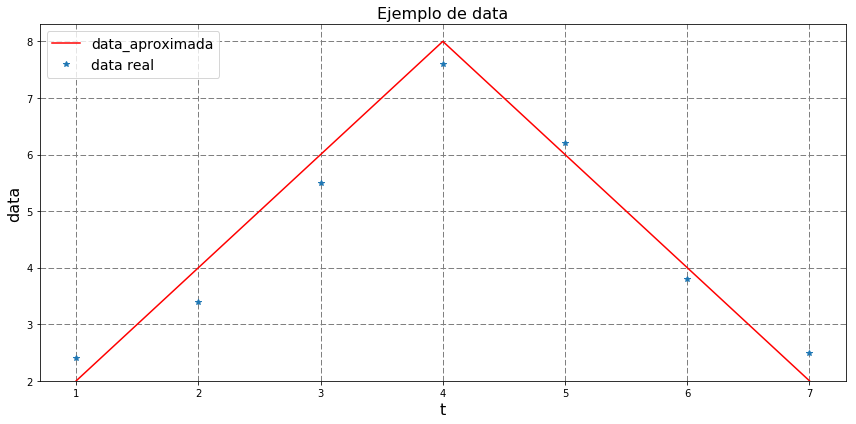

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data a graficar
t = [1,2,3,4,5,6,7]
data_real = [2,4,6,8,6,4,2]
data_aproximada = [2.4,3.4,5.5,7.6,6.2,3.8,2.5]

fig = plt.figure(figsize=(12, 6)) 
#Grafica de la data real
plt.plot(t,data_real,'-r', label = 'data_aproximada')
plt.hold(True)
#Grafica de la data aproximada
plt.plot(t, data_aproximada,'*', label = 'data real')
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.title("Ejemplo de data",fontsize = 16, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.axis('tight')
plt.legend(loc = 2,prop={'size':14})
plt.xlabel("t", fontsize = 16)
plt.xlim(min(t)-0.3,max(t) + 0.3)
plt.ylim(min(data_real),max(data_real) + 0.3)
plt.ylabel("data", fontsize = 16)

plt.tight_layout()
plt.show()

Una vez que tenga sus valores iniciales, debera encontrar los parametros $\alpha$ y $\beta$ que minimize la siguiente función:

$$ \displaystyle \sum_{i = 0}^{14} \left(\hat{I}(i) - I(i)\right)^2$$

Donde $I(i)$ es el número real de infectados en el día _i_ y $\hat{I}(i)$ es el número aproximado de individuos infectados que se ha obtenido resolviendo numéricamente el sistema de ecuaciones antes propuesto. Grafique la función con sus nuevas tasas versus los valores reales y concluya si su resultado es aceptable. Para minimizar puede hacer uso de la funcion <code>scipy.optimize.fmin</code>$^3$

_Hint1: Si la derivada de un punto nos da 0, quiere decir que hemos alcanzado el máximo de la función._ 


_Hint2: Recuerde los métodos de integración del laboratorio pasado. Tal vez no conocemos la función dentro de una integral, pero si los valores que tiene la función en distintos instantes._

## Desarrollo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import odeint
from matplotlib import gridspec
import time
from ipywidgets import widgets

## Pregunta 1

Para implementar el método de _broyden_ seguimos el _pseudo-codigo_ implementado por la misma pregunta:
```python
def Broyden(F,InitialVector,InitialMatrix):
    x_0 = InitialVector
    B_0 = InitialMatrix 
    for i = 0,1,2,...:
        x_{i+1} = x_{i} - B_{i} F(x_i)
        B_{i+1} = B_{i} + delta_{i+1} - B_{i}*Delta_{i+1}*delta_{i+1}^T B_i}/(delta_{i+1}^T*B_i*Delta_{i+1}
    end
where delta_i = x_i - x_{i-1} Delta_i = F(x_i) - F(x_{i-1})
```
Donde la función recibirá 3 parámetros, los cuales son una matriz con las funciones a la cuales yo quiero encontrar sus soluciones {$x_1$,$x_2$, $\cdots$ ,$x_n$}, un vector inicial _inicialVector_ para comenzar, y una matriz _inicialMatrix_, la cual sera el jacobiano de nuestra función, es decir, una matriz con los gradientes de cada función (sus derivadas parciales). Para el caso particular de esta tarea, llamaremos _F(x)_ a la funcion que recibe como parametro un vector $\vec{x}$, y evalua estos valores en la matriz de funciones _F_. Además, calcularemos _Fp(x)_ , la cual es la matriz jacobiana de la función _F_ evaluada en el vector $\vec{x}$.

In [3]:
#funcion pedida en pregunta 1
def F(x):
    return np.array([(x[1]**2 - x[0]**3), x[0]**2 + x[1]**2 - 1])
#jacobiano de la funcion
def F_p(x):
    return np.array([[(-3*x[0]**2), 2*x[1]],[2*x[0], 2*x[1]]])

#inicial guess
x_0 = np.array([1,1])

#calculamos la matriz jacobiana
B_0 = F_p(x_0)

#definimos la funcion de broyden
def broyden(F,x_inicial,B_inicial):
    tol = 1e-7
    x0 = x_inicial
    B0 = B_inicial
    x_i = x0
    B_i = B0
    g_i = 1
    #si la norma de g_i es mayor que una tolerancia, entonces se termina el while y se retorna x_i.
    while((np.linalg.norm(g_i)>tol)):
        x_i_anterior = x_i
        #aqui actualizamos el vector x_i
        x_i = x_i - np.dot(B_i,F(x_i))
        g_i = x_i - x_i_anterior
        d_i = F(x_i) - F(x_i_anterior)
        #aqui actualizamos la matriz B_i
        B_i = B_i + (1/(np.dot(np.dot(np.transpose(g_i),B_i),d_i)))*np.dot(np.dot((g_i - np.dot(B_i,d_i)),np.transpose(g_i)),B_i)
        #si el absoluto de esta funcion es menor que una tolerancia, nos retornara x_i
        if(abs(np.dot(np.dot(np.transpose(g_i),B_i),d_i)) < 1e-15):
            return x_i
    return x_i

#comparamos nuestro resultado con lo proporcionado por la biblioteca de scipy
x1 = scipy.optimize.broyden2(F, x_0, f_tol=1e-14)
print("Resultado real: ")
print(x1)
print("\n")
print("Resultado mio:")
x2 = broyden(F,x_0,B_0)
print(x2)

Resultado real: 
[ 0.75487767  0.65586562]


Resultado mio:
[ 0.75487767  0.65586562]


Nos damos cuenta de que el valor con el _initial guess_ dado es el mismo. Es importante destacar que si el _initial guess_ se aleja un poco de la solución, esta tendera a diverger, por lo que el _initial guess_ debe ser un vector de solución cercano a la solución real.

## Pregunta 2

Creamos una función F que tendra las ecuaciones de nuestro sistema, y luego crearemos la funcion solve_SIR que resuelve las 3 ecuaciones al mismo tiempo.

In [4]:
#Definimos las ecuaciones diferenciales planteadas en el enunciado
def F(y,a,b):
    return np.array([-b*y[0]*y[1],b*y[0]*y[1] - a*y[1],a*y[1]])
    
#resolvemos el problema con el metodo de euler, pasandole un initial guess y2 y los valores de alpha y beta.
def solve_SIR(y2,a,b):
    xi = [763,y2,0]
    #discretizamos el espacio en 200 puntos de 0 a 14, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F(xi,a,b)
    #retornamos el valor de I(t) en 14.    
    return xi[1]

In [5]:
#Probamos nuestro algoritmo
initial_guess = 10

solx = solve_SIR(initial_guess,0.4477,0.0022)
print("Valor de I(14) sin aplicar busqueda de 0:")
print(solx)
print("\n")

#Definimos la funcion a la cual le aplicaremos la busqueda de 0 con broyden.
def g(x):
    return(solve_SIR(x,0.4477,0.0022) - 23)

x1 = scipy.optimize.broyden2(g,initial_guess)
print("Valor de I(14) aplicando busqueda de 0:")
print(x1)

Valor de I(14) sin aplicar busqueda de 0:
10.6190505186


Valor de I(14) aplicando busqueda de 0:
1.1695173865745745


In [6]:
def solve_SIR_graphic(y2,a,b):
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,y2,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,a,b)
        
    #Por si se desea imprimir los valores de S,I,R:
    
    #print("S(14):")
    #print(y_1[len(y_1)-1])
    #print("\n")
    #print("I(14):")
    #print(y_2[len(y_2)-1])
    #print("\n")
    #print("R(14):")
    #print(y_3[len(y_3)-1])
    #print("\n")
    
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("tiempo", fontsize = 14)
    plt.ylabel("población", fontsize = 14)

    plt.tight_layout()
    plt.show()

Initial guess luego de la busqueda de 0:
1.1695173865745745




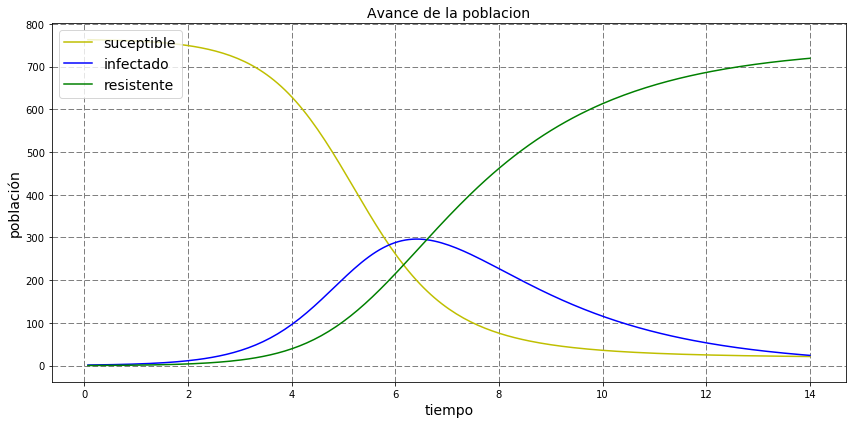

In [7]:
print("Initial guess luego de la busqueda de 0:")
print(x1)
print("\n")
solve_SIR_graphic(x1,0.4477,0.0022)

## Pregunta 4

Realizamos una funcion con las mismas caracteristicas de antes, pero por cada valor que adquiera el _widget_ se calculara nuevamente los valores iniciales (cambiando a o b segun sea el caso):

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.diferent_a_graphic>

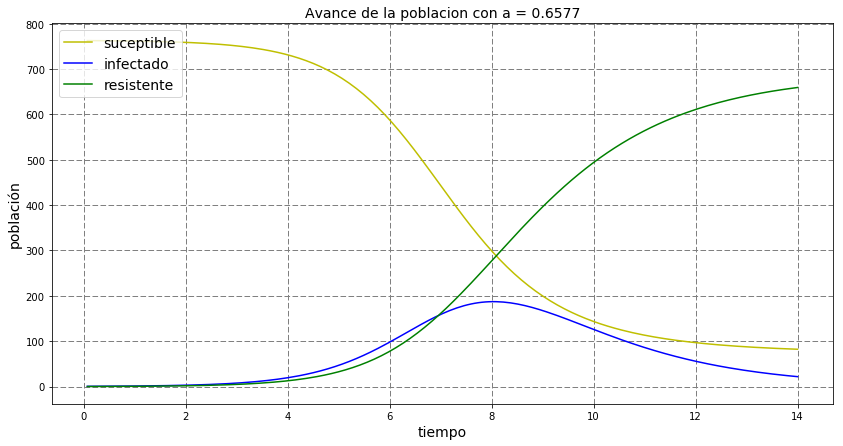

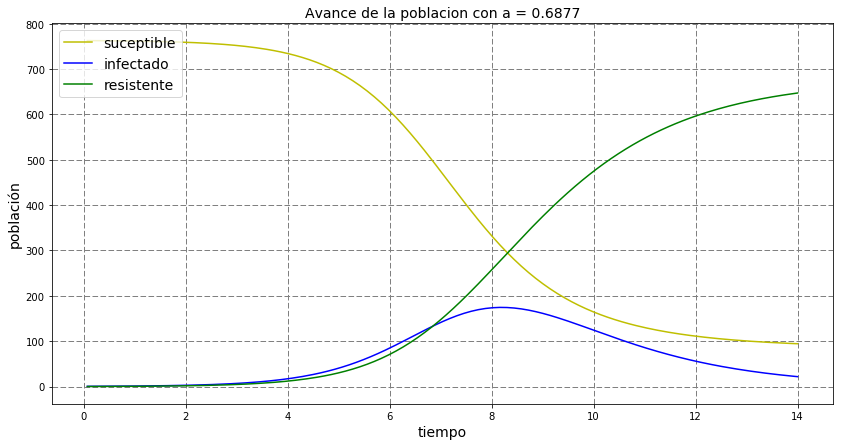

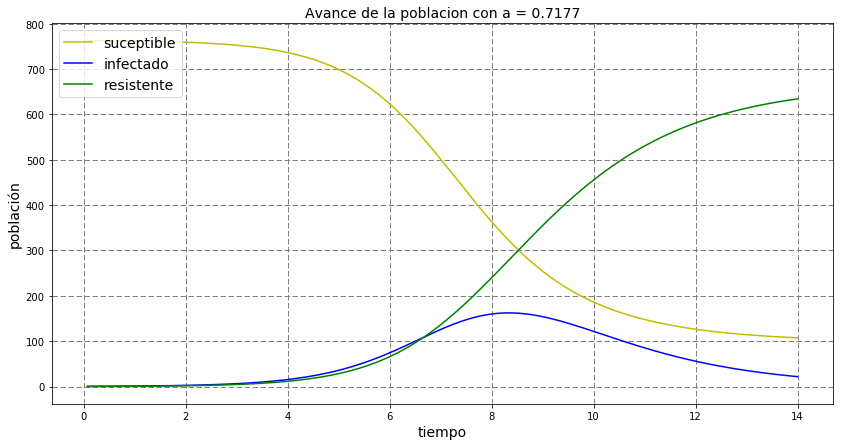

In [8]:
def diferent_a_graphic(a):    
    
    initial_guess = 1

    solx = solve_SIR(initial_guess,a,0.0022)
    
    def g3(x):
        return(solve_SIR(x,a,0.0022) - 21)

    x1 = scipy.optimize.broyden2(g3,initial_guess)
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,x1,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,a,0.0022)
    
    fig = plt.figure(figsize=(14, 7)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion con a = " + str(a),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("tiempo", fontsize = 14)
    plt.ylabel("población", fontsize = 14)

dp = 0.03
widgets.interact(diferent_a_graphic,a=(0.4477,0.8888,dp))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.diferent_b_graphic>

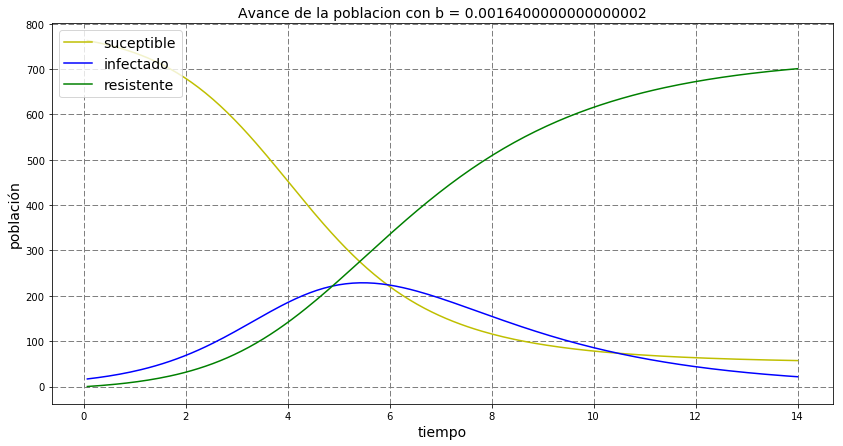

In [9]:
def diferent_b_graphic(b):    

    initial_guess = 1

    solx = solve_SIR(initial_guess,0.4477,(b/1000))
    
    def g2(x):
        return(solve_SIR(x,0.4477,b/1000) - 21)

    x1 = scipy.optimize.broyden2(g2,initial_guess)
    
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,x1,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,0.4477,b/1000)
    
    fig = plt.figure(figsize=(14, 7)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion con b = " + str(b/1000),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("tiempo", fontsize = 14)
    plt.ylabel("población", fontsize = 14)

dp = 0.03
widgets.interact(diferent_b_graphic,b=(1.1,2.2,dp))

* Para el caso $\alpha$:
    * Nos damos cuenta que a medida que $\alpha$ aumenta el _pic_ (cantidad máxima) de infectados va bajando, por lo que logicamente la cantidad de personas resistentes tambien baja, y la cantidad de personas suceptibles aumenta. Podemos deducir entonces que $\alpha$ esta relacionada con la gente en recuperación (tasa de recuperación).
* Para el caso $\beta$:
    * Nos damos cuenta que a medida que $\beta$ aumenta el _pic_ (cantidad máxima) de infectados va aumentando, por lo que logicamente la cantidad de personas resistentes tambien sube, y la cantidad de personas suceptibles disminuye. Podemos deducir entonces que $\beta$ esta relacionada con la mortalidad de la gente (tasa de mortalidad).

## Pregunta 5

Empecemos con la estimación del parámetro $\beta$. Como disponemos de los datos I(ti) (con ti el día i) y N = 763, observamos que al reemplazar en la segunda ecuación por nuestros datos iniciales tenemos:

$$ I'(0) \approx \beta S(0)I(0)$$

Despejando $\beta$ tenemos lo siguiente:

$$\displaystyle \beta = \frac{I'(0)}{S(0)I(0)}$$

Sabemos que $S(0) = 762$ y $I(0) = 1$. Ademas, por _forward difference_ el dato I'(0) lo podemos aproximar por el cociente:

$$ \displaystyle I'(0) \approx \frac{I(1) - I(0)}{1 - 0}$$

Teniendo todos estos datos, procedemos a calcular $\beta$:

$$\displaystyle \beta \approx \frac{(I(1) - I(0)}{S(0)I(0)} = \frac{3-1}{763\cdot1} \approx 0.0026 $$

Ahora, tenemos que estimar el parámetro $\alpha$. Para esto, usamos la primera ecuación:

$$\displaystyle \large \frac{dS}{dt} = -\beta\cdot S(t)\cdot I(t) $$

Integrando, encontramos S(t):

$$\displaystyle \large S(t) = Cte \cdot e^{-\beta \cdot \int_{0}^{t} I(s)\, ds} $$

Como sabemos S(0) = 763, tenemos que:

$$\displaystyle \large S(t) = 763 \cdot e^{-\beta \cdot \int_{0}^{t} I(s)\, ds} $$

Luego, llamamos $t^*$  al instante en el que _I(t)_ alcanza su valor máximo, al calcular la derivada en ese punto sabemos que esta derivada sera 0. Segun nuestra tabla $t = 6$, por lo que usando nuestra segunda ecuación nuevamente, tenemos que:

$$\displaystyle \large 0 = I'(t^*) = \beta S(t^*) I(t^*) - \alpha I(t^*) \rightarrow \alpha = \beta S(t^*) $$

Si evaluamos en nuestra funcion anterior por $t^*$, podemos realizar lo siguiente:

$$\displaystyle \large \alpha = \beta S(t^*) = 0.0026 \cdot 763 \cdot e^{-\beta \cdot \int_{0}^{t*} I(s)\, ds} $$

Debemos calcular la integral $\displaystyle \int_{0}^{t*} I(s)\, ds$. Teniendo nuestra tabla, podemos usar alguno de los métodos de integración numerica vista en el curso. Usando método del trapecio con 6 puntos tenemos:

$$\displaystyle \int_{0}^{t*} I(s)\, ds \approx \frac{\frac{6-0}{6}}{2} \cdot \left(1 + 2\cdot (3 + 8 + 28 + 75 + 221) + 291\right) = 481$$

In [10]:
print((1 + 2*3 + 2*8 + 2*28 + 2*75 + 2*221 + 291)/2)

481.0


Por lo que finalmente nuestra expresion nos queda:

$$ \displaystyle \large 0.0026 \cdot 763 \cdot e^{-0.0026 \cdot 481} \approx 0.5680 $$

In [11]:
from math import exp
print(0.0026*763*exp(-0.0026*481))

0.5680272973674592


Tenemos entonces que:

* $\large \alpha = 0.5680$

  
* $\large \beta = 0.0026$

graficando nuestra funcion con estos valores, nos queda el siguiente gráfico:

In [12]:
def infectados_graphic(y2,a,b):
    x = []
    y_2 = []
    valores_reales = [3,8,28,75,221,291,255,235,190,125,70,28,12,5]
    dias = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    xi = np.array([763,y2,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_2.append(xi[1])
        xi = xi + h*F(xi,a,b)
    print(y_2[len(y_2)-1])
    # grafico mitad de arco con p = 0
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_2,'-r', label = 'data infectados aproximada')
    plt.hold(True)
    plt.plot(dias, valores_reales,'*', label = 'data infectados real')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.xlim(min(x)-50,max(x) + 50)
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("x", fontsize = 14)
    plt.ylabel("y", fontsize = 14)

    plt.tight_layout()
    plt.show()

6.91329986344


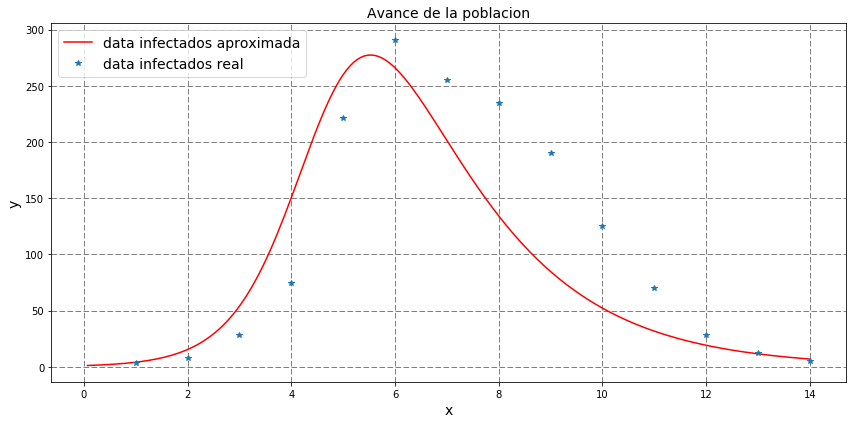

In [13]:
infectados_graphic(x1,0.5680,0.0026)

Nos damos cuenta que nuestra curva esta desfazada, por lo que debemos corregir nuestras tasas con la fórmula del enunciado. Para esto, creamos la función <code>proximo()</code> que nos encuentra los valores mas cercanos a un numero en una lista (mas adelante se expone un ejemplo). Esto lo hacemos ya que al generar nuestro <code>time_grid</code> con más de 14 valores, los valores generados son decimales, por lo que nos costará encontrar los valores de $\hat{I(1)}$, $\hat{I(2)}$,etc. Esta funcion nos encontrara los valores mas cercanos al valor que coloquemos: 

In [14]:
def proximo(final,numeros):
    def el_menor(numeros):
        menor = numeros[0]
        retorno = 0
        for x in range(len(numeros)):
            if numeros[x]<menor:
                menor = numeros[x]
                retorno = x
        return retorno
 
    diferencia = []
    for x in range(len(numeros)):
        diferencia.append(abs(final - numeros[x]))
    return numeros[el_menor(diferencia)]

numeros = [30,15,20,43,56,10]
 
print (proximo(35, numeros))

30


In [15]:
def infectados_a_b(y2,a,b):
    y_2 = []
    indice_valores_approx = []
    resultado = []
    
    #Genero todos los valores de los I(t) hasta t = 14.
    xi = np.array([763,y2,0])
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        y_2.append(xi[1])
        xi = xi + h*F(xi,a,b)
    
    #Busco los indices de los valores mas cercanos a 1,2,...,14
    for i in range(1,15):
        indice_valores_approx.append(time_grid.tolist().index(proximo(i, time_grid)))
    #Cambio el ultimo valor ya que 199 a 198 es sale de la lista de y_2
    indice_valores_approx[13] = 198
    #Agrego a resultado los valores de los indice que almacene en valores_aprox.
    for i in range(len(indice_valores_approx)):
        resultado.append(y_2[indice_valores_approx[i]])
        
    return resultado

In [16]:
#Vemos que los valores de las personas infectadas son "similares" a los reales, con los valores de alpha y beta que nos dieron originalmente
infectados_a_b(x1,0.4477,0.0022)

[3.7311090935718161,
 11.754851775612394,
 38.449487384868576,
 103.03948862453714,
 211.08616868085241,
 289.82117849716622,
 281.59471652551019,
 221.06137027458487,
 161.11831071006216,
 112.77313230515324,
 77.318878232415017,
 50.960328178455597,
 34.302684514570871,
 23.668398718764106]

In [17]:
#Generamos la lista de los numeros reales
valores_reales = [3,8,28,75,221,291,255,235,190,125,70,28,12,5]

#Generamos la funcion de minimizacion del enunciado, donde los parametros son alpha y beta
def f2(valor):    
    suma = 0
    valores_mentira = infectados_a_b(x1,valor[0],valor[1])
    for i in range(14):
        suma = suma + (valores_mentira[i] - valores_reales[i])**2
    return suma

#Calculamos el minimo de nuestra funcion, usando como valores iniciales los estimados anteriormente
scipy.optimize.fmin(f2,np.array([0.5680,0.0026]))

Optimization terminated successfully.
         Current function value: 4182.593732
         Iterations: 39
         Function evaluations: 75


array([ 0.45102431,  0.00218393])

23.9496201886


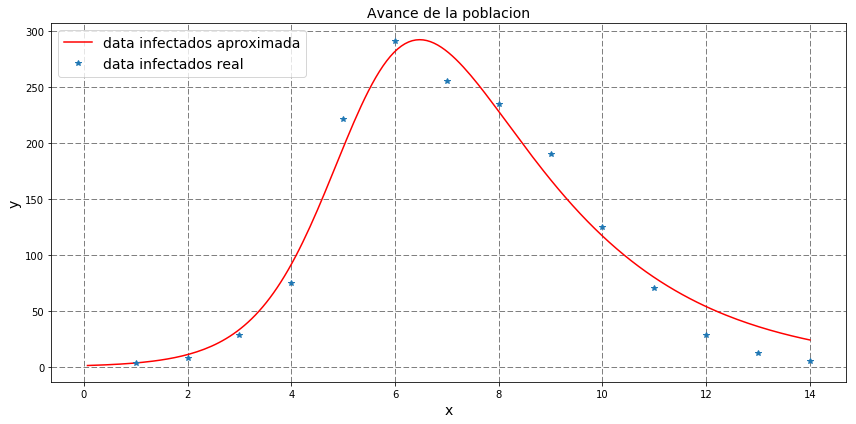

In [18]:
#Finalmente graficamos los valores reales vs los valores con nuestros alpha y betas optimizados.
infectados_graphic(x1,0.45102431,0.00218393)

Nos damos cuenta que al corregir los valores estimados al principio por nuestra función de minimización, se acerca bastante a los valores reales calculados anteriormente. 

<div id='instr' />
# 4. _Instrucciones_:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<div id='ref' />
# 5. _Referencias_:

* 1.- Pagina 133 del libro guia del curso _Numerical Analysis by Timothy Sauer_
* 2.- Documentacion de _Interact_:
    - http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* 3.- Documentación de la funcion _fmin_:
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html